# IF3070 Foundations of Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 19

Group Members:
- Yasra Zhafirah (18222002)
- Benedicta Eryka Santosa (18222031)
- Kerlyn Deslia Andeskar (18222090)
- Dahayu Ramaniya Aurasindu (18222099)

## Import Libraries

In [292]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.preprocessing import OneHotEncoder, RobustScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as Imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer
# Import other libraries if needed

## Import Dataset

In [333]:
# Example of reading a csv file from a gdrive link

# Take the file id from the gdrive file url
# https://drive.google.com/file/d/1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU/view?usp=sharing => The file id is 1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU
# and then put it in this format:
# https://drive.google.com/uc?id={file_id}
# Don't forget to change the access to public

df = pd.read_csv('https://drive.google.com/uc?id=1_ACviZ7hMl05xJUJMSchSMDTMV81Tp_-')
df

id     FILENAME                                   URL  URLLength  \
0            1          NaN             https://www.northcm.ac.th       24.0   
1            4  8135291.txt                   http://uqr.to/1il1z        NaN   
2            5   586561.txt  https://www.woolworthsrewards.com.au       35.0   
3            6          NaN                                   NaN       31.0   
4           11   412632.txt                                   NaN        NaN   
...        ...          ...                                   ...        ...   
140399  235790    49490.txt                                   NaN        NaN   
140400  235791          NaN   https://www.greenmountainenergy.com       34.0   
140401  235792          NaN       https://www.leadcastingcall.com       30.0   
140402  235794          NaN                https://www.fedarb.com       21.0   
140403  235795   464776.txt           https://www.risenenergy.com       26.0   

                              Domain  DomainLength  IsDomainIP  TLD  \
0                  www.northcm.ac.th          17.0         0.0  NaN   
1                                NaN           NaN         NaN   to   
2       www.woolworthsrewards.com.au          28.0         0.0   au   
3                                NaN           NaN         NaN  com   
4             www.nyprowrestling.com          22.0         0.0  NaN   
...                              ...           ...         ...  ...   
140399          www.slavevoyages.org           NaN         0.0  NaN   
140400   www.greenmountainenergy.com           NaN         0.0  com   
140401       www.leadcastingcall.com          23.0         NaN  NaN   
140402                           NaN          14.0         NaN  NaN   
140403           www.risenenergy.com          19.0         NaN  NaN   

        CharContinuationRate  TLDLegitimateProb  ...  Pay  Crypto  \
0                   0.800000                NaN  ...  0.0     0.0   
1                   1.000000           0.000896  ...  NaN     0.0   
2                   0.857143                NaN  ...  1.0     0.0   
3                   0.562500           0.522907  ...  1.0     0.0   
4                   1.000000                NaN  ...  0.0     0.0   
...                      ...                ...  ...  ...     ...   
140399              1.000000           0.079963  ...  NaN     0.0   
140400              1.000000           0.522907  ...  1.0     NaN   
140401              1.000000           0.522907  ...  0.0     0.0   
140402              1.000000           0.522907  ...  0.0     0.0   
140403              1.000000           0.522907  ...  0.0     0.0   

        HasCopyrightInfo  NoOfImage  NoOfCSS  NoOfJS  NoOfSelfRef  \
0                    1.0        NaN      3.0     NaN         69.0   
1                    0.0        NaN      NaN     NaN          NaN   
2                    1.0       33.0      7.0     8.0         15.0   
3                    1.0       24.0      5.0    14.0          NaN   
4                    1.0        NaN      NaN    14.0          NaN   
...                  ...        ...      ...     ...          ...   
140399               1.0       23.0      3.0     6.0          NaN   
140400               1.0       26.0      NaN     NaN        169.0   
140401               1.0       25.0      NaN     NaN         87.0   
140402               1.0        NaN     36.0     NaN        102.0   
140403               NaN       34.0      3.0     3.0        126.0   

        NoOfEmptyRef  NoOfExternalRef  label  
0                NaN              NaN      1  
1                NaN              1.0      0  
2                NaN              2.0      1  
3                NaN              NaN      1  
4                0.0              NaN      1  
...              ...              ...    ...  
140399          12.0              NaN      1  
140400          15.0             40.0      1  
140401           1.0             93.0      1  
140402           NaN              NaN      1  
140403           3.0   

In [294]:
# Membuat fungsi untuk kolom binary terlebih dahulu sebelum mengidentifikasi jumlah uniques values untuk fitur categorical
# Hal ini dikarenakan data yang binary termasuk dalam categorical

# Fungsi untuk mengidentifikasi kolom binary
def identify_binary_columns(df):
    binary_cols = []

    for column in df.columns:
       # Mengambil nilai unik, mengabaikan missing values (nan)
        unique_values = df[column].dropna().unique()

        # Cek apakah kolom memiliki tepat 2 nilai unik dan nilai-nilainya adalah 0 dan 1
        if len(unique_values) == 2 and set(unique_values) == {0, 1}:
            binary_cols.append(column)

    return binary_cols

# Identifikasi kolom binary
binary_columns = identify_binary_columns(df)

# Tampilkan hasil
print("Kolom Binary dalam Dataset:")
print("=" * 100)
print(f"Jumlah kolom binary: {len(binary_columns)}")
print("\nDaftar kolom binary:")

# Format tampilan ke samping
for col in binary_columns:
    # Bulatkan nilai sebelum menghitung
    rounded_values = df[col].round()
    value_counts = rounded_values.value_counts()
    percentages = (value_counts/len(df)*100).round(2)

    print(f"\n{col}:")
    print(f"Value counts: 0: {value_counts.get(0.0, 0):>6}, 1: {value_counts.get(1.0, 0):>6}", end="  |  ")
    print(f"Percentages: 0: {percentages.get(0.0, 0):>6.2f}%, 1: {percentages.get(1.0, 0):>6.2f}%")

Kolom Binary dalam Dataset:
Jumlah kolom binary: 20

Daftar kolom binary:

IsDomainIP:
Value counts: 0:  98226, 1:     48  |  Percentages: 0:  69.96%, 1:   0.03%

HasObfuscation:
Value counts: 0:  74654, 1:     30  |  Percentages: 0:  53.17%, 1:   0.02%

IsHTTPS:
Value counts: 0:   3483, 1:  87559  |  Percentages: 0:   2.48%, 1:  62.36%

HasTitle:
Value counts: 0:   2390, 1:  93435  |  Percentages: 0:   1.70%, 1:  66.55%

HasFavicon:
Value counts: 0:  38407, 1:  43575  |  Percentages: 0:  27.35%, 1:  31.04%

Robots:
Value counts: 0:  57167, 1:  36505  |  Percentages: 0:  40.72%, 1:  26.00%

IsResponsive:
Value counts: 0:  18287, 1:  79575  |  Percentages: 0:  13.02%, 1:  56.68%

NoOfURLRedirect:
Value counts: 0:  64135, 1:   8885  |  Percentages: 0:  45.68%, 1:   6.33%

NoOfSelfRedirect:
Value counts: 0:  71570, 1:   2119  |  Percentages: 0:  50.97%, 1:   1.51%

HasDescription:
Value counts: 0:  26951, 1:  58814  |  Percentages: 0:  19.20%, 1:  41.89%

HasExternalFormSubmit:
Value coun

In [295]:
# Fungsi untuk mengidentifikasi DataType dan Category dari masing-masing Variable yang ada
def category_identification(df, binary_columns):

    # Buat DataFrame untuk summary
    summary = pd.DataFrame(columns=['Variable', 'Datatype', 'Category'])

    # Isi DataFrame dengan informasi setiap kolom
    for i, column in enumerate(df.columns, 1):
        datatype = str(df[column].dtype)

        # Tentukan category berdasarkan kriteria
        if column in binary_columns:
            category = 'Categorical'
        elif datatype == 'object':
            category = 'Categorical'
        else:
            category = 'Numerical'

        # Tambahkan ke DataFrame summary
        row = pd.DataFrame({
            'Variable': [column],
            'Datatype': [datatype],
            'Category': [category]
        })
        summary = pd.concat([summary, row], ignore_index=True)
    # Menampilkan hasil
    print("\nCategory Identification:")
    print("=" * 100)
    print(summary.to_string(index=False))

    return summary

# Menjalankan fungsi
summary_df = category_identification(df, binary_columns)

# Hitung jumlah masing-masing kategori
category_counts = summary_df['Category'].value_counts()

# Menampilkan informasi tambahan
print("\nInformation:")
print("=" * 100)
print(f"Total Variables: {len(summary_df)}")
print(f"Numerical Variables: {category_counts.get('Numerical', 0)} ({(category_counts.get('Numerical', 0)/len(summary_df)*100):.2f}%)")
print(f"Categorical Variables: {category_counts.get('Categorical', 0)} ({(category_counts.get('Categorical', 0)/len(summary_df)*100):.2f}%)")


Category Identification:
                  Variable Datatype    Category
                        id    int64   Numerical
                  FILENAME   object Categorical
                       URL   object Categorical
                 URLLength  float64   Numerical
                    Domain   object Categorical
              DomainLength  float64   Numerical
                IsDomainIP  float64 Categorical
                       TLD   object Categorical
      CharContinuationRate  float64   Numerical
         TLDLegitimateProb  float64   Numerical
               URLCharProb  float64   Numerical
                 TLDLength  float64   Numerical
             NoOfSubDomain  float64   Numerical
            HasObfuscation  float64 Categorical
        NoOfObfuscatedChar  float64   Numerical
          ObfuscationRatio  float64   Numerical
          NoOfLettersInURL  float64   Numerical
          LetterRatioInURL  float64   Numerical
           NoOfDegitsInURL  float64   Numerical
           Deg

In [296]:
# Mendapatkan daftar categorical features

# drop 'label' karena label adalah target variable bukan features variable
categorical_features = summary_df[(summary_df['Category'] == 'Categorical') & 
                                (summary_df['Variable'] != 'label')]['Variable']
numerical_features = summary_df[summary_df['Category'] == 'Numerical']['Variable']
print("categorical_features:", categorical_features.tolist())
print("numerical_features:", numerical_features.tolist())

categorical_features: ['FILENAME', 'URL', 'Domain', 'IsDomainIP', 'TLD', 'HasObfuscation', 'IsHTTPS', 'HasTitle', 'Title', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo']
numerical_features: ['id', 'URLLength', 'DomainLength', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'LineOfCode', 'LargestLineLength', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'NoOfPopup', 'NoOfiFrame', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef']


# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [297]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
# train_set, val_set = ...

# Menyimpan original training set untuk digunakan nanti
original_train_set = df.copy()

# Memisahkan features (x) dan target (y)
X = df.drop('label', axis=1) # drop target = label
y = df['label']

# Split into training dan validation sets (80-20 split with stratification)
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,  # Untuk reproducibility
    stratify=y  # Maintain/menjaga class distribution dalam seluruh set
)

train_set = pd.concat([X_train, y_train], axis=1)
val_set = pd.concat([X_val, y_val], axis=1)

print("Original dataset shape:", original_train_set.shape)
print("Training set shape:", train_set.shape)
print("Validation set shape:", val_set.shape)

print("\nClass distribution:")
print("Original set:\n", original_train_set['label'].value_counts(normalize=True))
print("\nTraining set:\n", train_set['label'].value_counts(normalize=True))
print("\nValidation set:\n", val_set['label'].value_counts(normalize=True))

Original dataset shape: (140404, 56)
Training set shape: (112323, 56)
Validation set shape: (28081, 56)

Class distribution:
Original set:
 label
1    0.924831
0    0.075169
Name: proportion, dtype: float64

Training set:
 label
1    0.924833
0    0.075167
Name: proportion, dtype: float64

Validation set:
 label
1    0.924825
0    0.075175
Name: proportion, dtype: float64


In [298]:
# Memastikan tidak ada data yang hilang setelah splitting
assert len(original_train_set) == len(train_set) + len(val_set)

# Memastikan tidak ada data yang overlap antara train dan validation
assert set(train_set.index).intersection(set(val_set.index)) == set()

# Menyimpan index splitting untuk reproducibility nantinya
train_idx = train_set.index
val_idx = val_set.index

# Mengecek rasio splitting
split_ratio = len(train_set) / len(original_train_set)
print(f"\nActual training set ratio: {split_ratio:.2f}")


Actual training set ratio: 0.80


# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [299]:
# Split numerical and categorical features
train_set_num = X_train[numerical_features] # train set untuk numerical features
train_set_cat = X_train[categorical_features] # train set untuk categorical features

val_set_num = X_val[numerical_features] # validation set untuk numerical features
val_set_cat = X_val[categorical_features] # validation set untuk categorical features

In [300]:
# Cek missing values
print("Missing values in dataset:")
print(train_set.isnull().sum())

# Persentase missing values
print("\nPercentage of missing values (%):")
print((train_set.isnull().sum() / len(train_set) * 100).round(2))

Missing values in dataset:
id                                0
FILENAME                      45849
URL                           34695
URLLength                     48518
Domain                        56122
DomainLength                  37078
IsDomainIP                    33735
TLD                           36307
CharContinuationRate          38358
TLDLegitimateProb             42296
URLCharProb                   41653
TLDLength                     38157
NoOfSubDomain                 35075
HasObfuscation                52499
NoOfObfuscatedChar            53443
ObfuscationRatio              51481
NoOfLettersInURL              50672
LetterRatioInURL              52669
NoOfDegitsInURL               47019
DegitRatioInURL               42944
NoOfEqualsInURL               49215
NoOfQMarkInURL                35307
NoOfAmpersandInURL            36320
NoOfOtherSpecialCharsInURL    38045
SpacialCharRatioInURL         50203
IsHTTPS                       39547
LineOfCode                    55320
L

In [301]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

class FeatureImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.binary_features = ['HasObfuscation', 'IsHTTPS', 'HasTitle', 'HasFavicon', 'IsResponsive', 
                              'HasDescription', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 
                              'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 
                              'HasCopyrightInfo', 'Robots']
        
        self.numerical_features = ['CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
                                 'NoOfSubDomain', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'LineOfCode',
                                 'LargestLineLength', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'NoOfPopup',
                                 'NoOfiFrame', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
                                 'NoOfExternalRef', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'URLLength',
                                 'DomainLength', 'IsDomainIP', 'NoOfLettersInURL', 'LetterRatioInURL',
                                 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
                                 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL']
        
        self.categorical_features = ['FILENAME', 'TLD', 'URL', 'Domain']
        
        # Initialize imputers
        self.binary_imputer = SimpleImputer(strategy='most_frequent')
        self.numeric_imputer = SimpleImputer(strategy='median')
        self.categorical_imputer = SimpleImputer(strategy='most_frequent')
        self.title_imputer = SimpleImputer(strategy='constant', fill_value='unknown')

    def safe_division(self, x, y):
        try:
            return x / y if y != 0 else 0
        except:
            return 0

    def handle_url_features(self, row):
        if pd.notna(row['URL']):
            if pd.isna(row['URLLength']):
                row['URLLength'] = len(str(row['URL']))
            if pd.isna(row['IsHTTPS']):
                row['IsHTTPS'] = 1 if 'https://' in str(row['URL']).lower() else 0
            
            url = str(row['URL'])
            if pd.isna(row['NoOfLettersInURL']):
                row['NoOfLettersInURL'] = sum(c.isalpha() for c in url)
            if pd.isna(row['NoOfDegitsInURL']):
                row['NoOfDegitsInURL'] = sum(c.isdigit() for c in url)
            if pd.isna(row['NoOfEqualsInURL']):
                row['NoOfEqualsInURL'] = url.count('=')
            if pd.isna(row['NoOfQMarkInURL']):
                row['NoOfQMarkInURL'] = url.count('?')
            if pd.isna(row['NoOfAmpersandInURL']):
                row['NoOfAmpersandInURL'] = url.count('&')
            if pd.isna(row['NoOfOtherSpecialCharsInURL']):
                special_chars = '!@#$%^&*()_+-=[]{}|;:,.<>?/~`'
                row['NoOfOtherSpecialCharsInURL'] = sum(url.count(char) for char in special_chars)
            
            if pd.isna(row['CharContinuationRate']):
                if not url or len(url) < 2:
                    row['CharContinuationRate'] = 0
                else:
                    count = sum(1 for i in range(len(url)-1) if url[i] == url[i+1])
                    row['CharContinuationRate'] = count / (len(url)-1)

            if pd.notna(row['URLLength']) and row['URLLength'] > 0:
                if pd.isna(row['LetterRatioInURL']) and pd.notna(row['NoOfLettersInURL']):
                    row['LetterRatioInURL'] = self.safe_division(row['NoOfLettersInURL'], row['URLLength'])
                if pd.isna(row['DegitRatioInURL']) and pd.notna(row['NoOfDegitsInURL']):
                    row['DegitRatioInURL'] = self.safe_division(row['NoOfDegitsInURL'], row['URLLength'])
                if pd.isna(row['SpacialCharRatioInURL']) and pd.notna(row['NoOfOtherSpecialCharsInURL']):
                    row['SpacialCharRatioInURL'] = self.safe_division(row['NoOfOtherSpecialCharsInURL'], row['URLLength'])
        return row

    def handle_domain_features(self, row):
        if pd.notna(row['Domain']):
            if pd.isna(row['DomainLength']):
                row['DomainLength'] = len(str(row['Domain']))
            if pd.isna(row['IsDomainIP']):
                row['IsDomainIP'] = 0
            
            if pd.isna(row['TLD']):
                try:
                    row['TLD'] = str(row['Domain']).split('.')[-1]
                    if pd.isna(row['TLDLength']):
                        row['TLDLength'] = len(row['TLD'])
                except:
                    pass
            
            if pd.isna(row['NoOfSubDomain']):
                try:
                    row['NoOfSubDomain'] = len(str(row['Domain']).split('.')) - 1
                except:
                    pass
        return row

    def handle_special_correlations(self, row):
        if pd.isna(row['Title']):
            row['HasTitle'] = 0
            row['DomainTitleMatchScore'] = 0
            row['URLTitleMatchScore'] = 0
        
        if pd.isna(row['HasObfuscation']) and row['NoOfObfuscatedChar'] == 0:
            row['HasObfuscation'] = 0
            row['ObfuscationRatio'] = 0
        return row

    def fit(self, X, y=None):
        print("Handling URL and Domain features...")
        X = X.apply(self.handle_url_features, axis=1)
        X = X.apply(self.handle_domain_features, axis=1)
        
        print("Handling binary features...")
        self.binary_imputer.fit(X[self.binary_features])
        
        print("Handling numerical features...")
        self.numeric_imputer.fit(X[self.numerical_features])
        
        print("Handling title-related features...")
        self.title_imputer.fit(X[['Title']])
        
        print("Handling categorical features...")
        self.categorical_imputer.fit(X[self.categorical_features])
        
        print("Handling special correlations...")
        return self

    def transform(self, X):
        X_transformed = X.copy()
        
        # Apply URL and domain transformations
        X_transformed = X_transformed.apply(self.handle_url_features, axis=1)
        X_transformed = X_transformed.apply(self.handle_domain_features, axis=1)
        
        # Apply imputers
        X_transformed[self.binary_features] = self.binary_imputer.transform(X_transformed[self.binary_features])
        X_transformed[self.numerical_features] = self.numeric_imputer.transform(X_transformed[self.numerical_features])
        X_transformed['Title'] = self.title_imputer.transform(X_transformed[['Title']]).ravel()
        X_transformed[self.categorical_features] = self.categorical_imputer.transform(X_transformed[self.categorical_features])
        
        # Handle special correlations
        X_transformed = X_transformed.apply(self.handle_special_correlations, axis=1)
        
        # Verify missing values
        print("\nVerifying missing values...")
        missing_counts = X_transformed.isnull().sum()
        if missing_counts.sum() > 0:
            print("Warning: Some columns still have missing values:")
            print(missing_counts[missing_counts > 0])
        else:
            print("Success: No missing values remain!")
            
        return X_transformed

In [302]:
# Create and fit the imputer
imputer = FeatureImputer()
train_set_cleaned = imputer.fit_transform(train_set)

# Verify no missing values remain
print("Missing values after cleaning:")
print(train_set_cleaned.isnull().sum())

print("\nDataset shape after cleaning:")
print(f"Total rows: {train_set_cleaned.shape[0]}")
print(f"Total columns: {train_set_cleaned.shape[1]}")

Handling URL and Domain features...
Handling binary features...
Handling numerical features...
Handling title-related features...
Handling categorical features...
Handling special correlations...

Verifying missing values...
Success: No missing values remain!
Missing values after cleaning:
id                            0
FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfA

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).


Outliers Summary (using IQR):


Feature  Number of Outliers  Outliers Percentage (%)  \
0                           id                   0                     0.00   
1                    URLLength                6088                     5.42   
2                 DomainLength                2622                     2.33   
3         CharContinuationRate                   0                     0.00   
4            TLDLegitimateProb                   0                     0.00   
5                  URLCharProb               22488                    20.02   
6                    TLDLength               25244                    22.47   
7                NoOfSubDomain                 413                     0.37   
8           NoOfObfuscatedChar                  16                     0.01   
9             ObfuscationRatio                  26                     0.02   
10            NoOfLettersInURL                2656                     2.36   
11            LetterRatioInURL               15908                    14.16   
12             NoOfDegitsInURL                5885                     5.24   
13             DegitRatioInURL                5980                     5.32   
14             NoOfEqualsInURL                 357                     0.32   
15              NoOfQMarkInURL                 432                     0.38   
16          NoOfAmpersandInURL                 102                     0.09   
17  NoOfOtherSpecialCharsInURL                 725                     0.65   
18       SpacialCharRatioInURL               13218                    11.77   
19                  LineOfCode               53640                    47.76   
20           LargestLineLength               52442                    46.69   
21       DomainTitleMatchScore               22608                    20.13   
22          URLTitleMatchScore               21985                    19.57   
23                   NoOfPopup                6896                     6.14   
24                  NoOfiFrame               16732                    14.90   
25                   NoOfImage               15685                    13.96   
26                     NoOfCSS               44895                    39.97   
27                      NoOfJS               36649                    32.63   
28                 NoOfSelfRef               13672                    12.17   
29                NoOfEmptyRef               20336                    18.10   
30             NoOfExternalRef               55419                    49.34   

    Lower Bound  Upper Bound  
0    -118135.25    353686.75  
1         16.50        36.50  
2          7.00        31.00  
3         -0.38         1.83  
4         -0.58         1.19  
5          0.05         0.07  
6          3.00         3.00  
7         -0.50         3.50  
8          0.00         0.00  
9          0.00         0.00  
10         0.00        32.00  
11         0.27         0.77  
12         0.00         0.00  
13         0.00         0.00  
14         0.00         0.00  
15         0.00         0.00  
16         0.00         0.00  
17        -3.50         8.50  
18        -0.01         0.12  
19       939.00      1083.00  
20      2010.75      3452.75  
21       100.00       100.00  
22       100.00       100.00  
23         0.00         0.00  
24        -1.50         2.50  
25        -2.50        49.50  
26         3.50         7.50  
27         6.50        18.50  
28       -19.50       160.50  
29        -1.50         2.50  
30        36.50        40.50

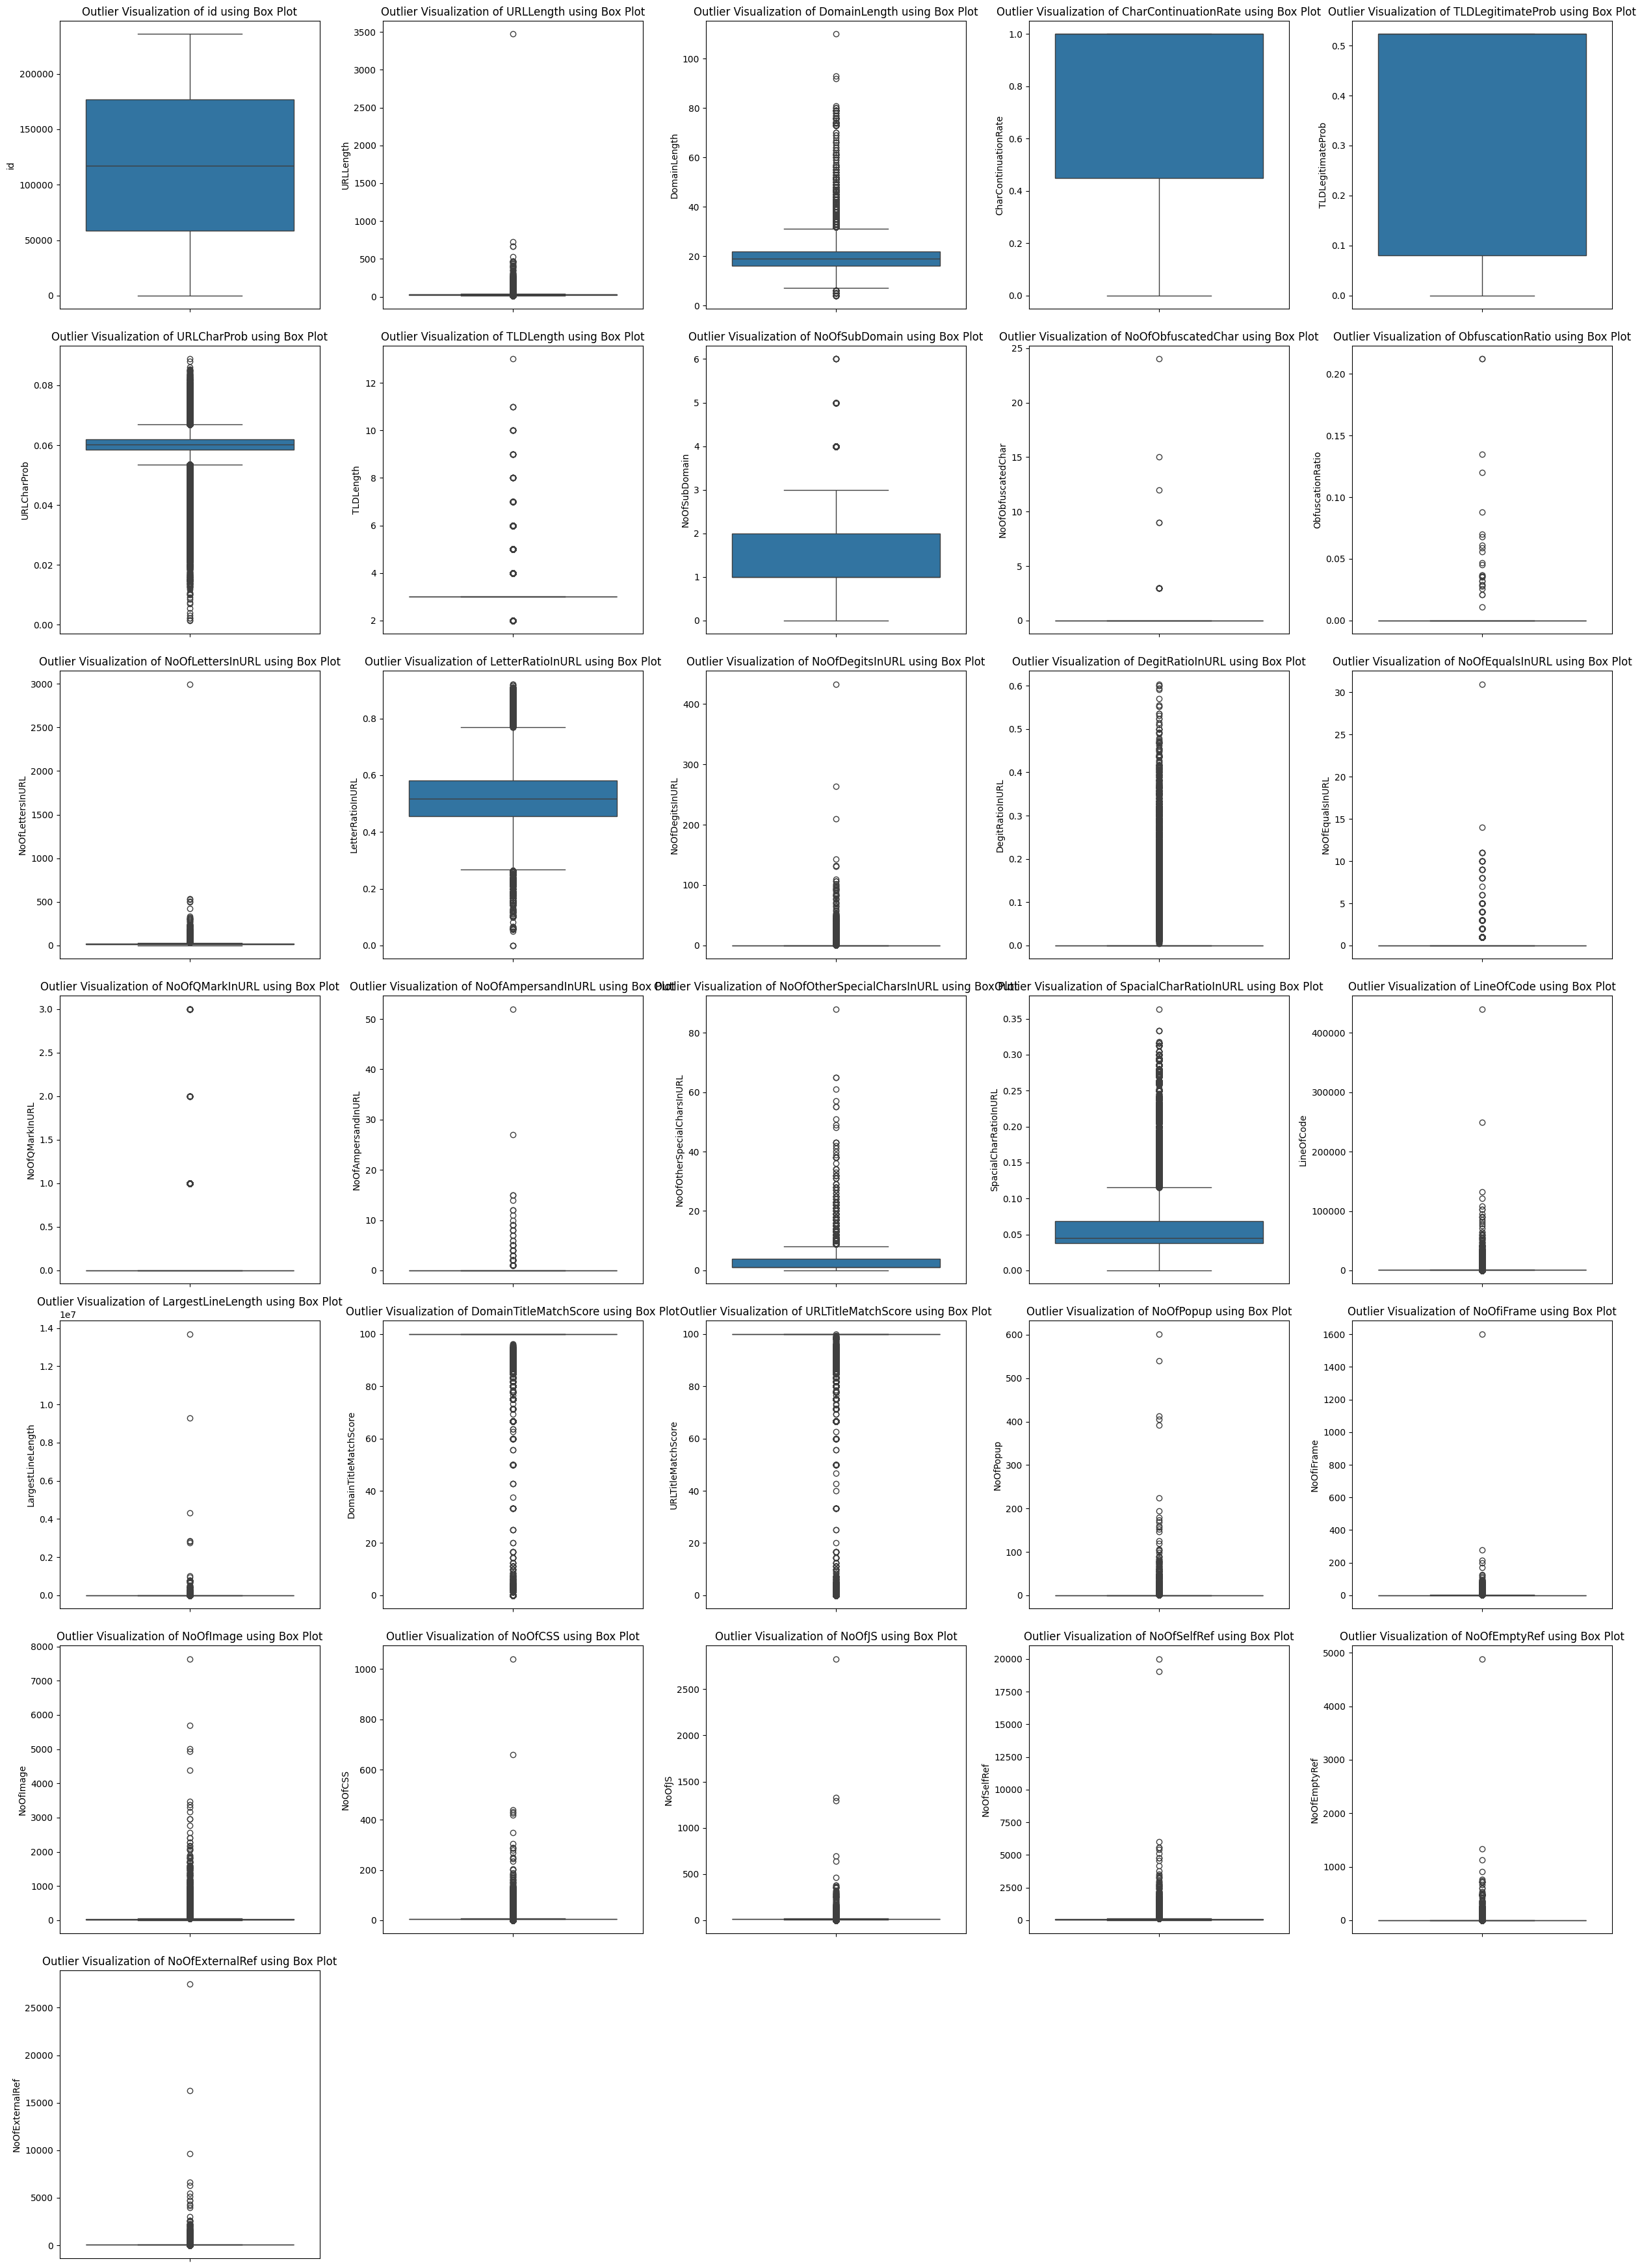


Outliers Analysis for Each Feature using Scatter Plot Visualization


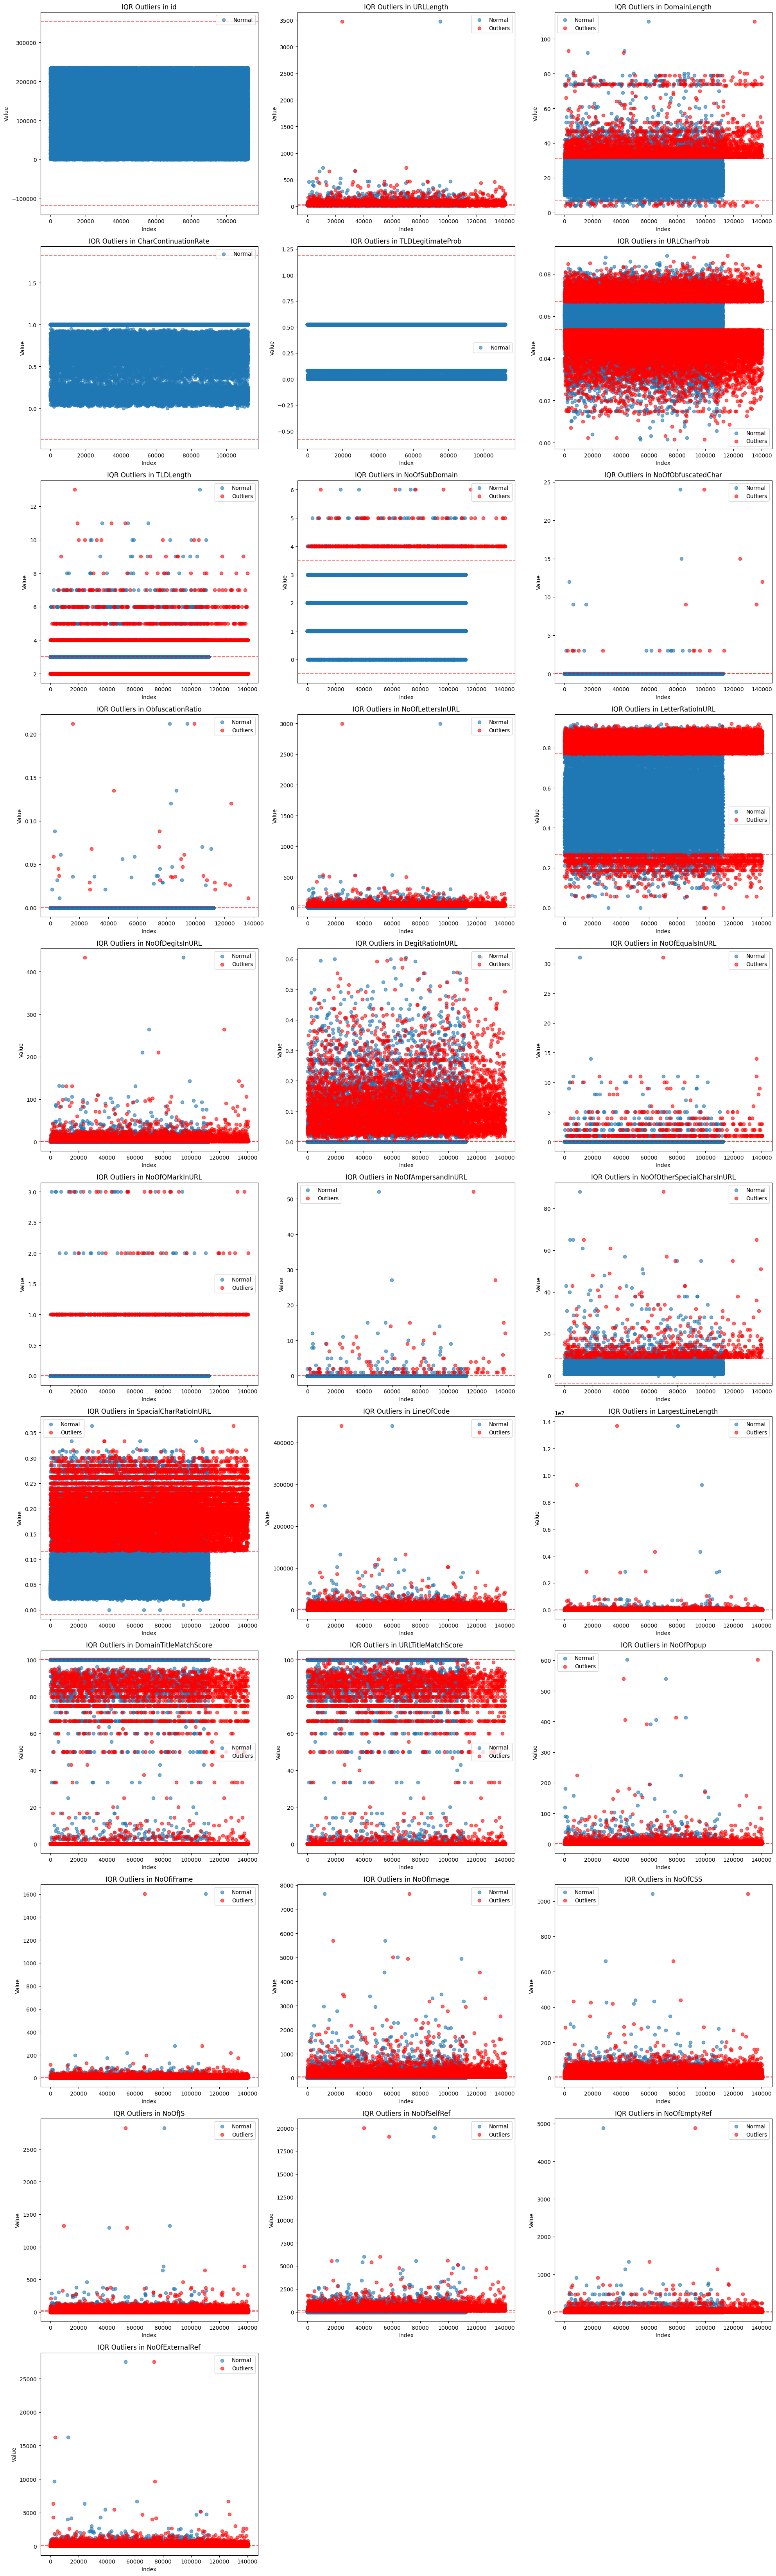

In [303]:
# Fungsi untuk mendeteksi outliers menggunakan metode perhitungan IQR
def outliers_detection(train_set_cleaned, column):
    Q1 = train_set_cleaned[column].quantile(0.25)
    Q3 = train_set_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers = train_set_cleaned[(train_set_cleaned[column] < lower_bound) | (train_set_cleaned[column] > upper_bound)][column]
    return len(outliers), lower_bound, upper_bound

# numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Mendapatkan kolom numerik yang bukan binary
# numerical_features = [col for col in df.columns
#                     if train_set_cleaned[col].dtype in ['int64', 'float64']
#                     and col not in binary_columns]

outliers_summary = []

for column in numerical_features:
    n_outliers, lower, upper = outliers_detection(train_set_cleaned, column)
    outliers_summary.append({
        'Feature': column,
        'Number of Outliers': n_outliers,
        'Outliers Percentage (%)': round((n_outliers/len(train_set_cleaned) * 100), 2),
        'Lower Bound': round(lower, 2),
        'Upper Bound': round(upper, 2)
    })

outliers_from_tsc = pd.DataFrame(outliers_summary)
print("\nOutliers Summary (using IQR):")
display(outliers_from_tsc)

# Visualisasi outliers
# Hitung jumlah kolom numerik
n_features = len(numerical_features)

# Hitung jumlah baris dan kolom yang dibutuhkan untuk subplot
n_cols = 5  # Kita tetap gunakan 5 kolom per baris
n_rows = (n_features + n_cols - 1) // n_cols  # Pembulatan ke atas untuk menentukan jumlah baris

# Buat plot
plt.figure(figsize=(25, 5*n_rows))  # Ukuran figure disesuaikan dengan jumlah baris

for i, column in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=train_set_cleaned, y=column)
    plt.title(f'Outlier Visualization of {column} using Box Plot')

plt.tight_layout()
plt.show()

print("\nOutliers Analysis for Each Feature using Scatter Plot Visualization")
print("=" * 100)
# Visualisasi scatter plot
n_features = len(numerical_features)
n_cols = 3  # Menggunakan 3 kolom per baris untuk scatter plot
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(20, 6*n_rows))

for i, column in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)

    # Menghitung IQR
    Q1 = train_set_cleaned[column].quantile(0.25)
    Q3 = train_set_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Buat plot semua data
    plt.scatter(range(len(train_set_cleaned)), train_set_cleaned[column], alpha=0.6, label='Normal')

   # Identifikasi dan plot outliers
    outliers = train_set_cleaned[(train_set_cleaned [column] < lower_bound) | (train_set_cleaned[column] > upper_bound)]
    if not outliers.empty:
        plt.scatter(outliers.index, outliers[column], color='red', alpha=0.6, label='Outliers')

    # Menambahkan garis batas
    plt.axhline(y=upper_bound, color='r', linestyle='--', alpha=0.5)
    plt.axhline(y=lower_bound, color='r', linestyle='--', alpha=0.5)

    plt.title(f'IQR Outliers in {column}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()

In [304]:
# # Handling outliers
# def handle_outliers(train_set_cleaned, numerical_features):
#     for col in numerical_features:
#         Q1 = train_set_cleaned[col].quantile(0.25)
#         Q3 = train_set_cleaned[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - (1.5 * IQR)
#         upper_bound = Q3 + (1.5 * IQR)

#         train_set_cleaned[col] = train_set_cleaned[col].clip(lower=lower_bound, upper=upper_bound)
#     return train_set_cleaned

# # Applying clipping strategy
# outliers_train_set_cleaned = handle_outliers(train_set_cleaned, train_set_num.columns)
# # outliers_val_set_cleaned = handle_outliers(val_set, val_set_num.columns)

In [305]:
class CappingOutliers(BaseEstimator, TransformerMixin):
    def __init__(self, factor=1.5):
        self.factor = factor
        self.bounds_ = {}

    def _get_numerical_features(self, X):
        # Identify numerical features in the dataset
        return X.select_dtypes(include=[np.number]).columns.tolist()

    def fit(self, X, y=None):
        # Identify numerical features
        self.numerical_features_ = self._get_numerical_features(X)
        
        # Compute bounds for each numerical feature
        for feature in self.numerical_features_:
            Q1 = X[feature].quantile(0.25)
            Q3 = X[feature].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - self.factor * IQR
            upper_bound = Q3 + self.factor * IQR
            self.bounds_[feature] = {'lower': lower_bound, 'upper': upper_bound}
        
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for feature, bounds in self.bounds_.items():
            X_transformed[feature] = X[feature].clip(lower=bounds['lower'], upper=bounds['upper'])
        return X_transformed

    def get_feature_bounds(self):
        return self.bounds_

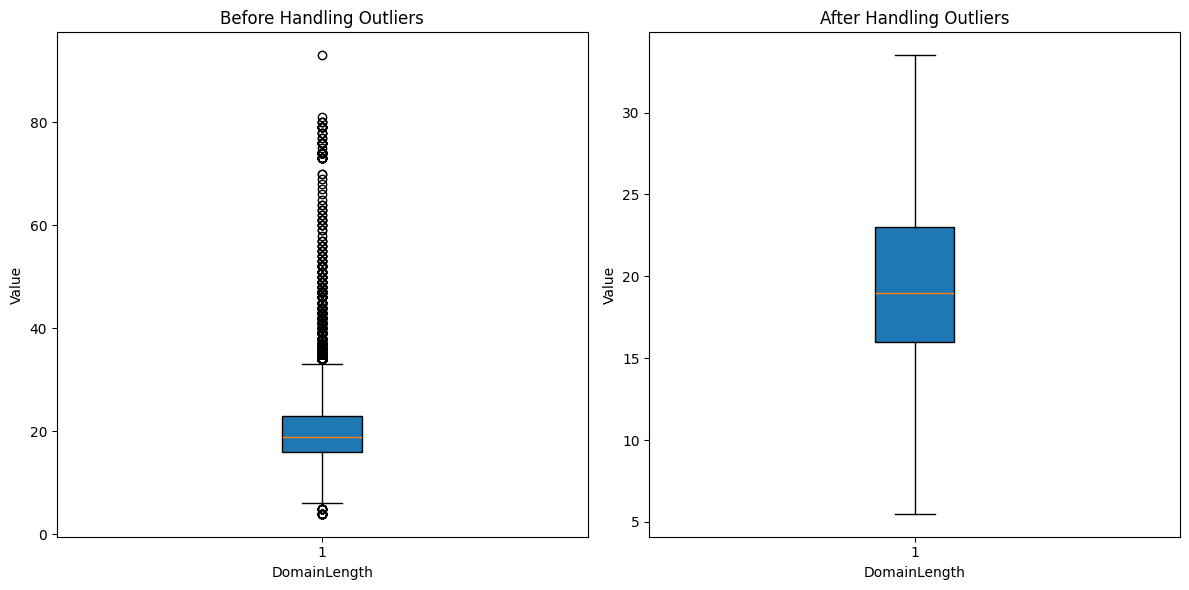


Bounds used for DomainLength:
Lower bound: 5.50
Upper bound: 33.50


In [306]:
def plot_outlier_comparison(original_data, transformed_data, feature='DomainLength', figsize=(12, 6)):
  
    fig, ax = plt.subplots(1, 2, figsize=figsize)
    
    # Before handling outliers
    ax[0].boxplot(original_data[feature].dropna(), vert=True, patch_artist=True)
    ax[0].set_title('Before Handling Outliers')
    ax[0].set_xlabel(feature)
    ax[0].set_ylabel('Value')
    
    # After handling outliers
    ax[1].boxplot(transformed_data[feature].dropna(), vert=True, patch_artist=True)
    ax[1].set_title('After Handling Outliers')
    ax[1].set_xlabel(feature)
    ax[1].set_ylabel('Value')
    
    plt.tight_layout()
    plt.show()

# Create and apply the outlier capping transformer
capping = CappingOutliers()
outliers_train_set_cleaned = capping.fit_transform(train_set)

# Create the visualization
plot_outlier_comparison(train_set, outliers_train_set_cleaned, feature='DomainLength')

# If you want to see the bounds that were used for DomainLength
bounds = capping.get_feature_bounds()
print("\nBounds used for DomainLength:")
print(f"Lower bound: {bounds['DomainLength']['lower']:.2f}")
print(f"Upper bound: {bounds['DomainLength']['upper']:.2f}")

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [307]:
# Checks duplicates untuk outlier_handling (data setelah handling outliers dan setelah handling missing values)

print("Checks duplicates for outlier_handling (data after handling outlier and after handling missing values)")

# Identify duplicate rows
duplicates = outliers_train_set_cleaned.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Display the duplicate rows if any
if num_duplicates > 0:
    print("\nDuplicate Rows:")
    print(outliers_train_set_cleaned[duplicates])

Checks duplicates for outlier_handling (data after handling outlier and after handling missing values)
Number of duplicate rows: 0


In [308]:
from sklearn.base import BaseEstimator, TransformerMixin

class RemoveDuplicates(BaseEstimator, TransformerMixin):
    def __init__(self, subset=None, keep='first'):
        self.subset = subset
        self.keep = keep
    
    def fit(self, X, y=None):
        # Store number of features and feature names
        self.n_features_in_ = X.shape[1]
        
        # Store feature names if available (for pandas DataFrame)
        if hasattr(X, 'columns'):
            self.feature_names_in_ = np.array(X.columns)
        
        # Calculate number of duplicates in training data
        if hasattr(X, 'duplicated'):
            # For pandas DataFrame
            duplicates = X.duplicated(subset=self.subset, keep=self.keep)
        else:
            # For numpy arrays
            X_unique = np.unique(X, axis=0)
            duplicates = len(X) - len(X_unique)
            
        self.n_duplicates_ = np.sum(duplicates)
        
        return self
    
    def transform(self, X):
        # Check if the input has the same number of features as during fit
        if X.shape[1] != self.n_features_in_:
            raise ValueError(
                f"Shape of input is different from what was seen in `fit`. "
                f"Expected {self.n_features_in_} features, got {X.shape[1]}."
            )
        
        # Remove duplicates
        if hasattr(X, 'drop_duplicates'):
            # For pandas DataFrame
            X_tr = X.drop_duplicates(subset=self.subset, keep=self.keep)
        else:
            # For numpy arrays
            X_tr = np.unique(X, axis=0)
            
        return X_tr
    
    def get_feature_names_out(self, input_features=None):
        if input_features is None and hasattr(self, 'feature_names_in_'):
            return self.feature_names_in_
        elif input_features is not None:
            return np.array(input_features)
        else:
            return np.array([f"feature{i}" for i in range(self.n_features_in_)])

In [309]:
# Buat instance transformer
duplicate_remover = RemoveDuplicates(subset=None, keep='first')

# Gunakan transformer untuk membersihkan data
# Ini akan secara otomatis melakukan assertion check dan menampilkan shape
train_set_cleaned_no_duplicates = duplicate_remover.fit_transform(train_set_cleaned)

# mengakses informasi tambahan
n_duplicates = duplicate_remover.n_duplicates_
print(f"Number of duplicates removed: {n_duplicates}")
print(f"Updated dataset shape: {train_set_cleaned_no_duplicates.shape}")

Number of duplicates removed: 0
Updated dataset shape: (112323, 56)


### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.


Kolom dengan variance 0:
Series([], dtype: float64)


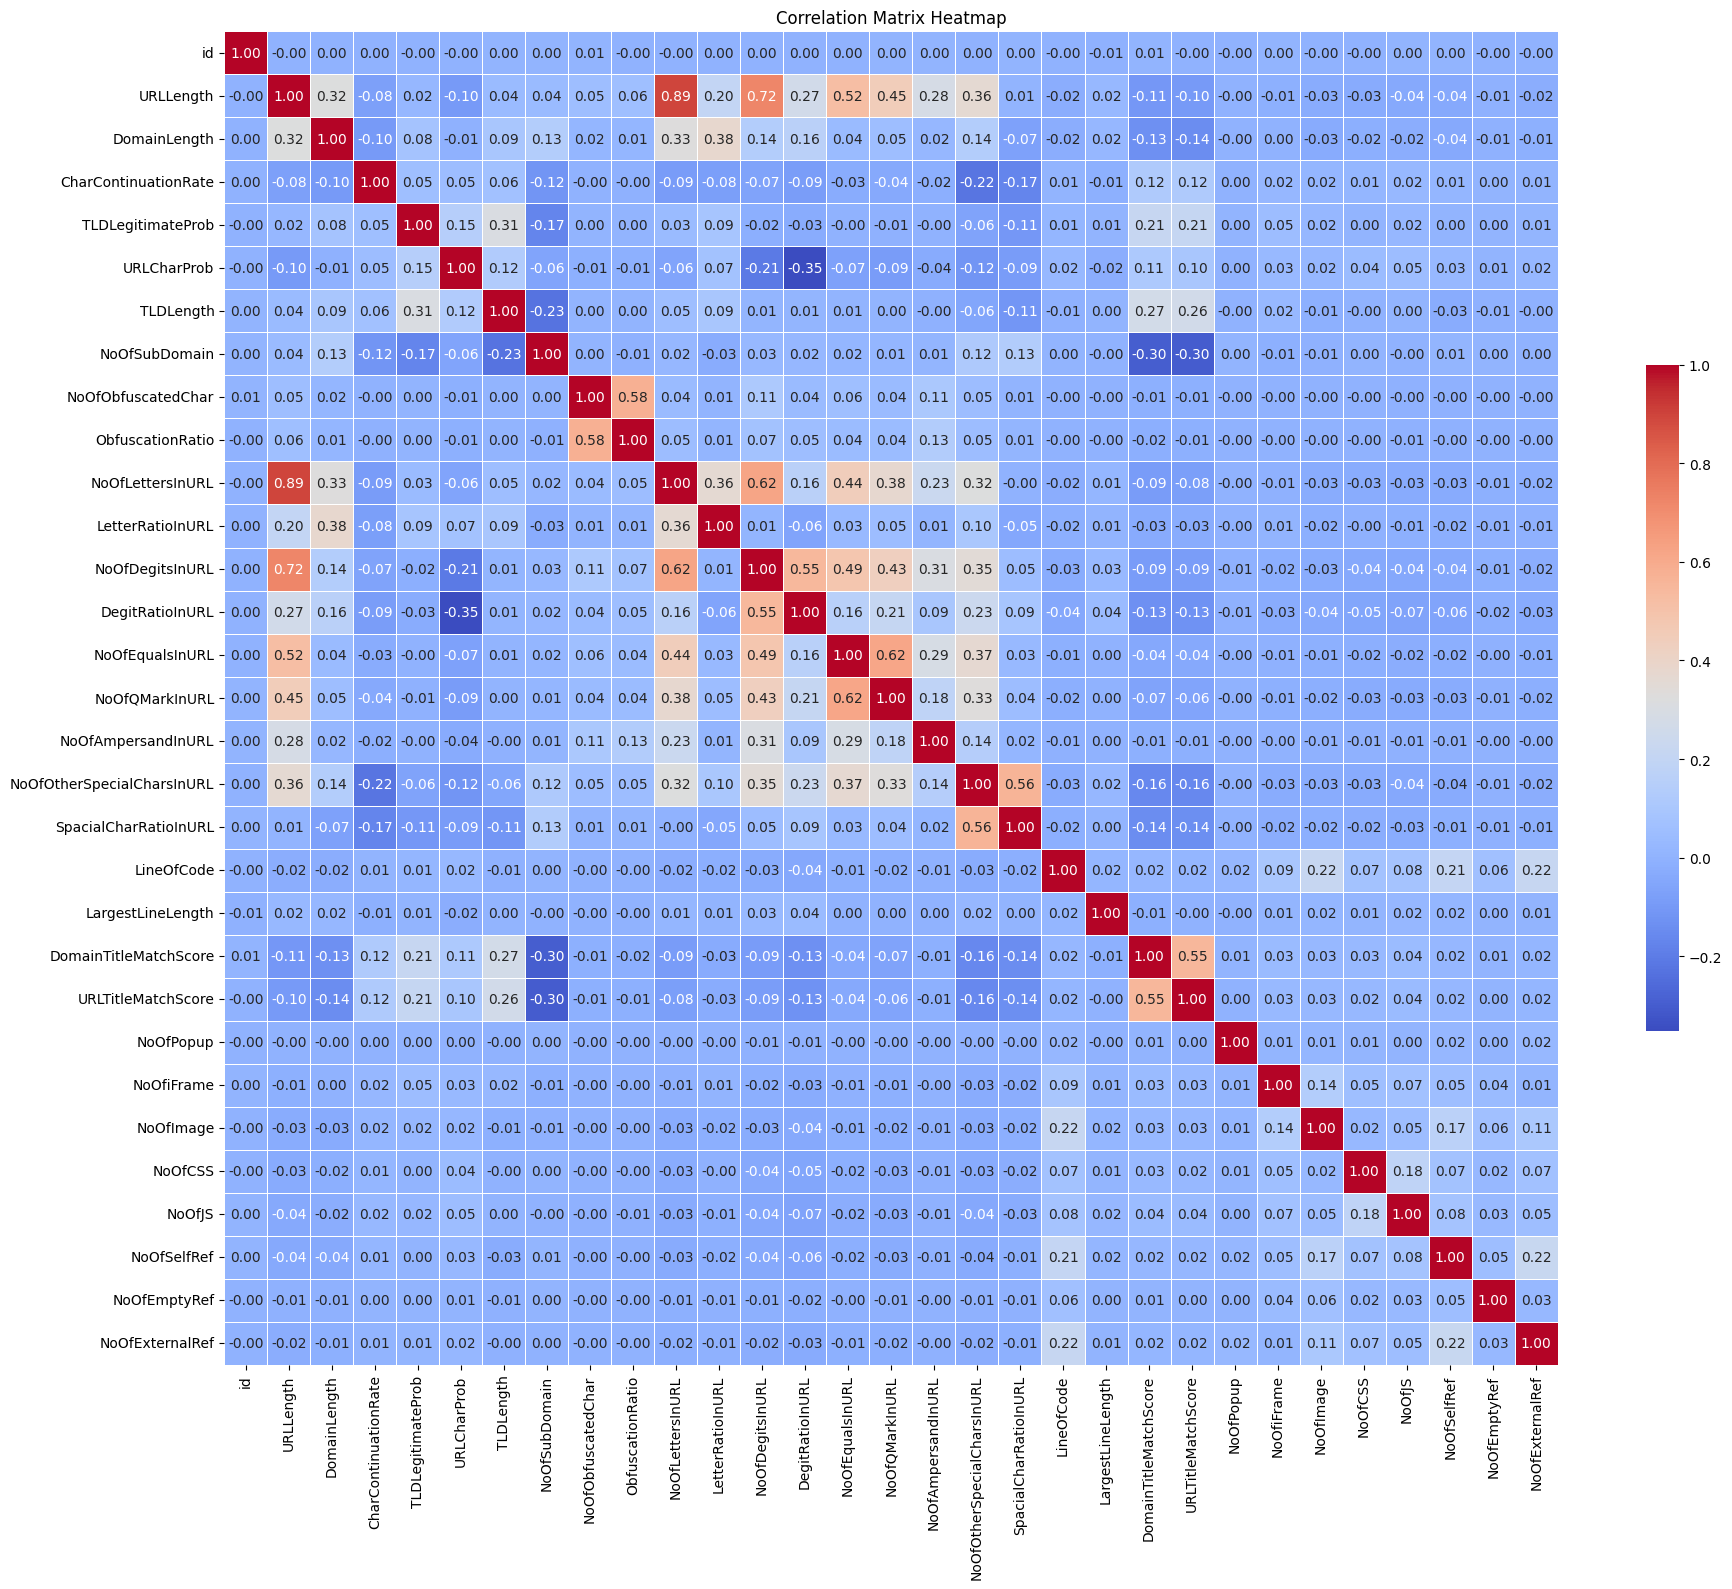

Correlation Matrix:
                                  id  URLLength  DomainLength  \
id                          1.000000  -0.002097      0.000684   
URLLength                  -0.002097   1.000000      0.321153   
DomainLength                0.000684   0.321153      1.000000   
CharContinuationRate        0.000585  -0.077019     -0.097101   
TLDLegitimateProb          -0.001080   0.021571      0.076260   
URLCharProb                -0.003541  -0.096462     -0.006133   
TLDLength                   0.002963   0.037448      0.093879   
NoOfSubDomain               0.002057   0.037010      0.133782   
NoOfObfuscatedChar          0.005549   0.052683      0.016429   
ObfuscationRatio           -0.000484   0.059376      0.012669   
NoOfLettersInURL           -0.002098   0.894463      0.326995   
LetterRatioInURL            0.001311   0.197263      0.379266   
NoOfDegitsInURL             0.001212   0.719983      0.135285   
DegitRatioInURL             0.000096   0.265470      0.163218   
NoOfE

In [310]:
# Analisis korelasi antar numerical features dengan menggunakan correlation matrix untuk mengetahui 
# hubungan antar numerical features, mana yang berkorelasi tinggi dan mana yang kurang berkorelasi 

numerical_data =train_set_cleaned_no_duplicates[numerical_features]

# Cek variance tiap numerical columns
print("\nKolom dengan variance 0:")
print(numerical_data.var()[numerical_data.var() == 0])


corr_matrix = numerical_data.corr()

# Visualisasi by plotting the correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f',
            linewidths=0.5,
            square=True,  # Membuat sel persegi
            cbar_kws={"shrink": .5})

plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# Display correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

In [311]:
# Menerapkan Feature Selection (secara implisit), Creating New Features (dengan polynomial features, interaction features, dan composite features),
# Binning or Discretization, Domain-Specific Feature Engineering

from sklearn.preprocessing import StandardScaler

class FeatureEngineering:
    def __init__(self):
        self.scaler = StandardScaler()
    def fit(self, X, y=None):
        # No fitting necessary for this transformer
        return self
    def create_polynomial_features(self, train_set_cleaned_no_duplicates, cols):
        # Create polynomial features (squared terms) for selected numerical columns
        train_set_cleaned_no_duplicates_copy = train_set_cleaned_no_duplicates.copy()
        for col in cols:
            train_set_cleaned_no_duplicates_copy[f'{col}_squared'] = train_set_cleaned_no_duplicates_copy[col] ** 2
        return train_set_cleaned_no_duplicates_copy
    
    def create_interaction_features(self, train_set_cleaned_no_duplicates):
        #Create interaction features between relevant URL metrics
        train_set_cleaned_no_duplicates_copy = train_set_cleaned_no_duplicates.copy()
        
        # URL and domain length ratio
        train_set_cleaned_no_duplicates_copy['url_domain_ratio'] = train_set_cleaned_no_duplicates_copy['URLLength'] / (train_set_cleaned_no_duplicates_copy['DomainLength'] + 1)
        
        # Special character density
        train_set_cleaned_no_duplicates_copy['special_char_density'] = (train_set_cleaned_no_duplicates_copy['NoOfOtherSpecialCharsInURL']) / (train_set_cleaned_no_duplicates_copy['URLLength'] + 1)
        
        # Security features composite
        # tidak pakai Robots karena variance 0
        train_set_cleaned_no_duplicates_copy['security_score'] = train_set_cleaned_no_duplicates_copy['IsHTTPS'] * train_set_cleaned_no_duplicates_copy['HasFavicon'] 
        
        # interaksi antar features yang berkorelasi signifikan
        train_set_cleaned_no_duplicates_copy['js_css_interaction'] = train_set_cleaned_no_duplicates_copy['NoOfJS'] * train_set_cleaned_no_duplicates_copy['NoOfCSS']
        train_set_cleaned_no_duplicates_copy['image_selfref_interaction'] = train_set_cleaned_no_duplicates_copy['NoOfImage'] * train_set_cleaned_no_duplicates_copy['NoOfSelfRef']

        return train_set_cleaned_no_duplicates_copy
    
    def create_content_complexity_score(self, train_set_cleaned_no_duplicates):
        # Create a composite score for page content complexity
        train_set_cleaned_no_duplicates_copy = train_set_cleaned_no_duplicates.copy()
        train_set_cleaned_no_duplicates_copy['content_complexity'] = (
            train_set_cleaned_no_duplicates_copy['NoOfImage'] + 
            train_set_cleaned_no_duplicates_copy['NoOfCSS'] + 
            train_set_cleaned_no_duplicates_copy['NoOfJS'] + 
            train_set_cleaned_no_duplicates_copy['NoOfSelfRef'] + 
            train_set_cleaned_no_duplicates_copy['NoOfExternalRef']
        ) / 5
        return train_set_cleaned_no_duplicates_copy
    
    def bin_url_length(self, train_set_cleaned_no_duplicates):
        # Bin URL lengths into categories
        train_set_cleaned_no_duplicates_copy = train_set_cleaned_no_duplicates.copy()
        bins = [0, 30, 60, 90, float('inf')]
        labels = ['short', 'medium', 'long', 'very_long']
        
        # Create categorical bins
        train_set_cleaned_no_duplicates_copy['url_length_category'] = pd.cut(train_set_cleaned_no_duplicates_copy['URLLength'], 
                                              bins=bins, 
                                              labels=labels)
        
        # Convert to numeric for ML models
        train_set_cleaned_no_duplicates_copy['url_length_binned'] = pd.factorize(train_set_cleaned_no_duplicates_copy['url_length_category'])[0]
        train_set_cleaned_no_duplicates_copy = train_set_cleaned_no_duplicates_copy.drop('url_length_category', axis=1)
        
        return train_set_cleaned_no_duplicates_copy
    
    def transform(self, train_set_cleaned_no_duplicates):
        #Apply all feature engineering transformations
        # Make a copy to avoid modifying the original dataframe
        train_set_cleaned_no_duplicates_transformed = train_set_cleaned_no_duplicates.copy()
        
        # Select numerical columns for polynomial features based on correlation analysis
        # These features showed moderate to strong correlations
        # URLLength, DomainLength = 0.80 (high correlation) sehingga hanya pilih salah satu saja dari mereka untuk menghindari redudansi
        # CharContinuationRate memiliki korelasi rendah dengan fitur lain

        # Polynomial features - pilih fitur yang tidak berkorelasi tinggi
        polynomial_cols =  ['URLLength', 'NoOfSelfRef']
        
        # Apply all transformations
        train_set_cleaned_no_duplicates_transformed = self.create_polynomial_features(train_set_cleaned_no_duplicates_transformed, polynomial_cols)
        train_set_cleaned_no_duplicates_transformed = self.create_interaction_features(train_set_cleaned_no_duplicates_transformed)
        train_set_cleaned_no_duplicates_transformed = self.create_content_complexity_score(train_set_cleaned_no_duplicates_transformed)
        train_set_cleaned_no_duplicates_transformed = self.bin_url_length(train_set_cleaned_no_duplicates_transformed)
        
        return train_set_cleaned_no_duplicates_transformed
    
    def get_feature_names(self, train_set_cleaned_no_duplicates, train_set_cleaned_no_duplicates_transformed):
        #get names of new features created
        return [col for col in train_set_cleaned_no_duplicates_transformed.columns if col not in train_set_cleaned_no_duplicates.columns]

In [312]:
fe = FeatureEngineering()
train_set_cleaned_no_duplicates_transformed = fe.transform(train_set_cleaned_no_duplicates)
new_features = fe.get_feature_names(train_set_cleaned_no_duplicates, train_set_cleaned_no_duplicates_transformed)

In [313]:
# # Menggunakan metode features selection, khususnya menerapkan teknik reduksi fitur berdasarkan 
# # analisis korelasi (correlation-based feature selection). 
# # Teknik reduksi adalah proses pengurangan kompleksitas data dengan mengurangi jumlah fitur (variabel), 
# # dimensi, atau volume data, sambil tetap mempertahankan informasi penting yang terkandung di dalamnya.

# '''
# menggabungkan 3 teknik feature engineering:
# 1. Feature Selection: memilih fitur berdasarkan analisis korelasi
# 2. Creating New Features:
# Polynomial: menambah fitur kuadrat
# Interaction: mengalikan antar fitur yang relevan
# 3. Binning: mengkategorikan fitur numerik menjadi bins --> ini untuk nanti saja karena jika
# melakukan binning sebelum membagi data menjadi training dan testing set,
# dapat berpotensi mengalami data leakage. Sehingga akan dilakukan binning setelah data dibagi.

# '''

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEngineer(BaseEstimator, TransformerMixin):
#    def __init__(self):
#        # Feature Selection based on correlation analysis
#         # Keep salah satu dari masing2 highly correlated group
#        self.selected_features = [
#            'URLLength', # Keep URLLength, drop DomainLength 
#            'NoOfSelfRef', # Keep NoOfSelfRef, drop NoOfImage
#            'NoOfJS',  # Keep NoOfJS, drop NoOfCSS
#            'LineOfCode',
#            'TLDLegitimateProb',
#            'URLCharProb'
#        ]
       
#    def fit(self, X, y=None):
#        return self
       
#    def transform(self, X):
#        X_new = X[self.selected_features].copy()
       
#        # Polynomial Features (degree 2)
#        for feature in ['URLLength', 'LineOfCode', 'NoOfJS']:
#            X_new[f'{feature}_squared'] = X_new[feature] ** 2
           
#        # Interaction Features
#        X_new['URL_JS_interaction'] = X_new['URLLength'] * X_new['NoOfJS']
#        X_new['Code_JS_interaction'] = X_new['LineOfCode'] * X_new['NoOfJS']
#        X_new['URL_Code_interaction'] = X_new['URLLength'] * X_new['LineOfCode']
       
#        # Binning 
#        X_new['URLLength_bin'] = pd.qcut(X_new['URLLength'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
#        X_new['LineOfCode_bin'] = pd.qcut(X_new['LineOfCode'], q=3, labels=['Low', 'Medium', 'High'])
#        X_new['TLDLegitimateProb_bin'] = pd.qcut(X_new['TLDLegitimateProb'], q=3, labels=['Low', 'Medium', 'High'])
       
#        # One-hot encode categorical columns
#        X_new = pd.get_dummies(X_new, columns=['URLLength_bin', 'LineOfCode_bin', 'TLDLegitimateProb_bin'])
       
#        return X_new

In [314]:
# # Feature selection berdasarkan analisis korelasi
# # hapus features yang redundant dan keep features yang memiliki korelasi lebih rendah untuk mengurangi multicollinearity
# def select_features_correlation(df_no_duplicates, threshold=0.5):
#     correlation_matrix = df_no_duplicates.corr()
#     high_correlation = np.where(np.abs(correlation_matrix) > threshold)
#     high_correlation = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y]) 
#                        for x, y in zip(*high_correlation) if x != y and x < y]
    
#     features_to_drop = []
#     for feat1, feat2, corr in high_correlation:
#         # Keep feature dengan non-null values lebih banyak atau first feature if equal
#         if df_no_duplicates[feat1].isnull().sum() <= df_no_duplicates[feat2].isnull().sum():
#             features_to_drop.append(feat2)
#         else:
#             features_to_drop.append(feat1)
            
#     return df_no_duplicates.drop(columns=list(set(features_to_drop)))

In [315]:
# # Feature creation through interactions
# def create_interaction_features(df_no_duplicates):
#     df2_no_duplicates = df_no_duplicates.copy()
    
#     # Create ratio between special chars and URL length
#     df2_no_duplicates['SpecialCharsToLength'] = df2_no_duplicates['NoOfOtherSpecialCharsInURL'] / df2_no_duplicates['URLLength']
    
#     # Create complexity score combining multiple metrics
#     df2_no_duplicates['URLComplexityScore'] = (df2_no_duplicates['URLLength'] * df2_no_duplicates['NoOfSubDomain'] * 
#                                                (1 + df2_no_duplicates['SpacialCharRatioInURL']))
    
#     # Create resource richness score
#     df2_no_duplicates['ResourceRichness'] = (df2_no_duplicates['NoOfImage'] + df2_no_duplicates['NoOfCSS'] + df2_no_duplicates['NoOfJS'])
    
#      # Security indicators ratio
#     df2_no_duplicates['SecurityScore'] = (df2_no_duplicates['IsHTTPS'] + df2_no_duplicates['HasFavicon'] + df2_no_duplicates['HasCopyrightInfo'])

#     # Form complexity score
#     df2_no_duplicates['FormComplexity'] = (df2_no_duplicates['HasExternalFormSubmit'] + df2_no_duplicates['HasSubmitButton'] + 
#                                           df2_no_duplicates['HasHiddenFields'] + df2_no_duplicates['HasPasswordField'])

#     # Reference legitimacy score
#     df2_no_duplicates['ReferenceScore'] = ((df2_no_duplicates['NoOfSelfRef'] * 2) + df2_no_duplicates['NoOfExternalRef'] - df2_no_duplicates['NoOfEmptyRef'])

#     return df2_no_duplicates

In [316]:
# df_reduced = select_features_correlation(df_no_duplicates, threshold=0.5)
# df2_no_duplicates = create_interaction_features(df_reduced)

# # Dimensionality Reduction using Principal Component Analysis for numerical features that show moderate correlations
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# # Men-select numerical features saja
# numerical_columns = [col for col in df.columns
#                     if df[col].dtype in ['int64', 'float64']
#                     and col not in binary_columns]

# df_numeric = df2_no_duplicates[numerical_columns]

# def apply_pca(df_numeric, n_components=0.95):
#     pca = PCA(n_components=n_components)
#     transformed_features = pca.fit_transform(df_numeric)
    
#     # Create new dataframe with PCA components
#     pca_cols = [f'PC{i+1}' for i in range(transformed_features.shape[1])]
#     df_pca = pd.DataFrame(transformed_features, columns=pca_cols)
    
#     return df_pca, pca

# df_pca, pca_model = apply_pca(df_numeric, n_components=0.95)

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [317]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [326]:
# Untuk fleksibilitas
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

class FeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self, method='robust', numerical_features=None):
        if method not in ['standard', 'minmax', 'robust']:
            raise ValueError("method must be either 'standard', 'minmax', or 'robust'")
        self.method = method
        self.scaler = None
        self.numerical_features = numerical_features
    
    def fit(self, X, y=None):
        # Inisialisasi appropriate scaler
        if self.method == 'minmax':
            self.scaler = MinMaxScaler()
        elif self.method == 'standard':
            self.scaler = StandardScaler()
        else:  # untuk robust
            self.scaler = RobustScaler()

       # Select only numeric columns 
        if self.numerical_features is None:
            self.numerical_features = X.select_dtypes(numerical_features)
        # Fit scaler
        self.scaler.fit(X[self.numerical_features])
        return self
    
    def transform(self, X):
        # Cek jika scaler sudah di fit
        if self.scaler is None:
            raise ValueError("Scaler has not been fitted. Call 'fit' first.")
        
        X_copy = X.copy()
        # Transform only numeric columns
        X_copy[self.numerical_features] = self.scaler.transform(X[self.numerical_features])
        
        return X_copy

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [319]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import scipy.sparse as sp

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, method='onehot', categorical_features=None):
        if method not in ['label', 'onehot']:
            raise ValueError("method must be either 'label' or 'onehot'")
        self.method = method
        self.categorical_features = categorical_features
        self.encoders = {}
        self.encoded_features = {}
    
    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        
        # Select only object/categorical columns
        if self.categorical_features is not None:
            categorical_columns = self.categorical_features
        else:
            # Fallback to automatic detection
            categorical_columns = X.select_dtypes(include=['object', 'category']).columns
        
        if len(categorical_columns) == 0:
            return self
            
        if self.method == 'label':
            # Fit label encoder for each categorical column
            for column in categorical_columns:
                encoder = LabelEncoder()
                encoder.fit(X[column].astype(str))
                self.encoders[column] = encoder
                self.encoded_features[column] = column
                
        else:  # onehot encoding
            # Fit one-hot encoder for each categorical column
            for column in categorical_columns:
                encoder = OneHotEncoder(sparse_output=True, handle_unknown='ignore')
                encoder.fit(X[[column]])
                self.encoders[column] = encoder
                # Store the encoded feature names
                self.encoded_features[column] = [
                    f"{column}_{val}" for val in encoder.get_feature_names_out([column])
                ]
        
        return self
    
    def transform(self, X):
        # Ensure input is DataFrame
        X = pd.DataFrame(X)
        
        # Create copy of numerical columns
        X_encoded = X.select_dtypes(exclude=['object', 'category']).copy()
        
        # Get categorical columns that have encoders
        categorical_columns = [col for col in X.columns if col in self.encoders]
        
        if len(categorical_columns) == 0:
            return X_encoded
            
        if self.method == 'label':
            # Apply label encoding
            for column in categorical_columns:
                encoder = self.encoders[column]
                X_encoded[column] = encoder.transform(X[column].astype(str))
                
        else:  # onehot encoding
            # Apply one-hot encoding
            encoded_sparse_matrices = []
            for column in categorical_columns:
                encoder = self.encoders[column]
                encoded_sparse_matrix = encoder.transform(X[[column]])
                encoded_sparse_matrices.append(encoded_sparse_matrix)
            
            # Combine sparse matrices with numerical data
            if not X_encoded.empty:
                X_encoded_sparse = sp.hstack([sp.csr_matrix(X_encoded)] + encoded_sparse_matrices)
            else:
                X_encoded_sparse = sp.hstack(encoded_sparse_matrices)
        
        return X_encoded_sparse if self.method == 'onehot' else X_encoded
        
    def get_feature_names(self):
        if self.method == 'label':
            return list(self.encoded_features.values())
        else:
            # Flatten list of encoded feature names for one-hot encoding
            return [name for names in self.encoded_features.values() for name in names]

In [320]:
# Untuk one-hot encoding (default)
encoder = FeatureEncoder()
X_encoded = encoder.fit_transform(X)

# Untuk label encoding
encoder = FeatureEncoder(method='label')
X_encoded = encoder.fit_transform(X)

# Mendapatkan nama fitur hasil encoding
feature_names = encoder.get_feature_names()

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [321]:
# Resampling methods dengan oversampling karena:
# Kita tidak ingin kehilangan informasi penting tentang pola phishing
# Dataset size masih manageable
# Lebih baik overfitting sedikit daripada kehilangan pola penting dalam deteksi phishing

# Oversampling baik digunakan karena:
# Tidak kehilangan informasi penting tentang pola phishing
# Dataset size masih manageable
# Dalam kasus keamanan, lebih baik mempertahankan semua informasi

# Kenapa tidak undersampling:
# Kasus keamanan seperti phishing detection memerlukan semua informasi yang ada
# Dataset size masih manageable untuk oversampling
# Kehilangan data legitimate bisa mengurangi kemampuan model membedakan pola URL yang aman

# def handle_imbalance(X, y):
#     oversampler = RandomOverSampler(random_state=42)
#     X_resampled, y_resampled = oversampler.fit_resample(X, y)
#     return X_resampled, y_resampled

In [322]:
# # Setelah membuat prediksi dengan model
# # metrics = evaluate_model(y_test, y_pred, y_prob)  # y_prob opsional
# # print_evaluation(metrics)

# def evaluate_model(y_true, y_pred, y_prob=None):
#     from sklearn.metrics import (
#         accuracy_score, precision_score, recall_score, f1_score,
#         confusion_matrix, roc_auc_score, classification_report
#     )
    
#     # Basic metrics
#     metrics = {
#         'accuracy': accuracy_score(y_true, y_pred),
#         'precision': precision_score(y_true, y_pred),
#         'recall': recall_score(y_true, y_pred),
#         'f1': f1_score(y_true, y_pred)
#     }
    
#     # Confusion Matrix
#     tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
#     metrics.update({
#         'true_negatives': tn,
#         'false_positives': fp,
#         'false_negatives': fn,
#         'true_positives': tp
#     })
    
#     # Additional metrics
#     metrics.update({
#         'specificity': tn / (tn + fp),  # True Negative Rate
#         'false_positive_rate': fp / (fp + tn),
#         'false_negative_rate': fn / (fn + tp),
#         'positive_predictive_value': tp / (tp + fp),  # Precision
#         'negative_predictive_value': tn / (tn + fn)
#     })
    
#     # ROC-AUC score if probabilities are provided
#     if y_prob is not None:
#         metrics['roc_auc'] = roc_auc_score(y_true, y_prob)
    
#     # Get detailed classification report
#     metrics['classification_report'] = classification_report(y_true, y_pred)
    
#     return metrics

# def print_evaluation(metrics):
#     print("\nModel Performance Metrics:")
#     print("=" * 50)
    
#     # Basic metrics
#     print("\nBasic Metrics:")
#     print(f"Accuracy: {metrics['accuracy']:.4f}")
#     print(f"Precision: {metrics['precision']:.4f}")
#     print(f"Recall: {metrics['recall']:.4f}")
#     print(f"F1-Score: {metrics['f1']:.4f}")
    
#     # Confusion Matrix components
#     print("\nConfusion Matrix Details:")
#     print(f"True Positives: {metrics['true_positives']}")
#     print(f"False Positives: {metrics['false_positives']}")
#     print(f"True Negatives: {metrics['true_negatives']}")
#     print(f"False Negatives: {metrics['false_negatives']}")
    
#     # Additional metrics
#     print("\nAdditional Metrics:")
#     print(f"Specificity: {metrics['specificity']:.4f}")
#     print(f"False Positive Rate: {metrics['false_positive_rate']:.4f}")
#     print(f"False Negative Rate: {metrics['false_negative_rate']:.4f}")
#     print(f"Positive Predictive Value: {metrics['positive_predictive_value']:.4f}")
#     print(f"Negative Predictive Value: {metrics['negative_predictive_value']:.4f}")
    
#     # ROC-AUC if available
#     if 'roc_auc' in metrics:
#         print(f"\nROC-AUC Score: {metrics['roc_auc']:.4f}")
    
#     # Classification Report
#     print("\nDetailed Classification Report:")
#     print(metrics['classification_report'])

In [323]:
# kombinasi metode

# Alur Penggunaan:

# Lakukan oversampling terlebih dahulu
# Train model dengan data yang sudah dibalance
# Untuk Naive Bayes, gunakan class weights
# Evaluasi menggunakan multiple metrics

from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.utils import compute_class_weight


def handle_imbalanced_classification(X, y):
    # resampling - Oversampling
    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    
    # evaluation Metrics
    def evaluate_model(y_true, y_pred, y_prob=None):
        metrics = {
            'precision': precision_score(y_true, y_pred),
            'recall': recall_score(y_true, y_pred),
            'f1': f1_score(y_true, y_pred),
            'confusion_matrix': confusion_matrix(y_true, y_pred)
        }
        if y_prob is not None:
            metrics['roc_auc'] = roc_auc_score(y_true, y_prob)
        return metrics
    
    # model Training with Class Weights (untuk Naive Bayes)
    class_weights = compute_class_weight('balanced', 
                                       classes=np.unique(y), 
                                       y=y)
    
    return X_resampled, y_resampled, evaluate_model, class_weights

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [327]:
from sklearn.pipeline import Pipeline

# # Note: You can add or delete preprocessing components from this pipeline
pipe = Pipeline([("imputer", FeatureImputer()),
                    ("capping", CappingOutliers()),
                    ("duplicate_remover", RemoveDuplicates()),
                  ("fe", FeatureEngineering()),
                  ("scaler", FeatureScaler(method='robust', numerical_features=numerical_features)),
                  ("encoder", FeatureEncoder())])

# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

In [328]:
# Your code should work up until this point
train_set = pipe.fit_transform(train_set)
val_set = pipe.transform(val_set)

Handling URL and Domain features...
Handling binary features...
Handling numerical features...
Handling title-related features...
Handling categorical features...
Handling special correlations...

Verifying missing values...
Success: No missing values remain!

Verifying missing values...
Success: No missing values remain!


C:\Users\kerly\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


or create your own here

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `label`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [396]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

from KNN import KNN

def test_knn_metrics():
    """Test KNN dengan berbagai metrik jarak"""
    
    # Load data
    print("Loading data...")
    df = pd.read_csv('../train/train.csv')  # Sesuaikan dengan path file Anda
    
    # Select features (sesuaikan dengan dataset Anda)
    numerical_features = [
        'URLLength', 'DomainLength', 'CharContinuationRate', 
        'TLDLegitimateProb', 'URLCharProb', 'NoOfSubDomain'
    ]
    
    X = df[numerical_features]
    y = df['label']
    
    # Handle missing values
    X = X.fillna(X.mean())
    
    # Split data
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    # Convert to DataFrame
    X_train_transformed = pd.DataFrame(X_train_scaled, columns=numerical_features)
    X_val_transformed = pd.DataFrame(X_val_scaled, columns=numerical_features)
    
    # Test different distance metrics
    metrics = ['euclidean', 'manhattan', 'minkowski']
    results = {}
    
    for metric in metrics:
        print(f"\nTesting KNN with {metric} distance:")
        
        # Initialize and train KNN
        knn_model = KNN(k=5, distance_metric=metric)
        knn_model.fit(X_train_transformed, y_train)
        
        # Save model
        model_filename = f"trained_knn_{metric}.pkl"
        with open(model_filename, 'wb') as f:
            pickle.dump(knn_model, f)
        print(f"Model saved as {model_filename}")
        
        # Make predictions
        y_val_pred = knn_model.predict(X_val_transformed)
        
        # Calculate metrics
        f1_macro = f1_score(y_val, y_val_pred, average='macro')
        
        print("\nClassification Report:")
        print(classification_report(y_val, y_val_pred))
        print(f'F1 Score (Macro Average) on Validation Set: {f1_macro}')
        
        results[metric] = {
            'f1_macro': f1_macro,
            'predictions': y_val_pred
        }
    
    # Compare results
    print("\nComparison of F1 Scores:")
    for metric, result in results.items():
        print(f"{metric}: {result['f1_macro']:.4f}")
    
    return results

if __name__ == "__main__":
    results = test_knn_metrics()

Loading data...

Testing KNN with euclidean distance:
Model saved as trained_knn_euclidean.pkl

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.45      0.58      2152
           1       0.96      0.99      0.97     25929

    accuracy                           0.95     28081
   macro avg       0.89      0.72      0.78     28081
weighted avg       0.95      0.95      0.94     28081

F1 Score (Macro Average) on Validation Set: 0.7785255543116956

Testing KNN with manhattan distance:
Model saved as trained_knn_manhattan.pkl

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.46      0.59      2152
           1       0.96      0.99      0.97     25929

    accuracy                           0.95     28081
   macro avg       0.89      0.73      0.78     28081
weighted avg       0.95      0.95      0.94     28081

F1 Score (Macro Average) on Validation Set: 0.782136594588379

In [401]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score
import pickle

# Import our KNN implementation
from KNN import KNN

def compare_knn_implementations():
    """Compare KNN from scratch vs scikit-learn implementation"""
    
    # Load data
    print("Loading data...")
    df = pd.read_csv('../train/train.csv')
    
    # Select features
    numerical_features = [
        'URLLength', 'DomainLength', 'CharContinuationRate', 
        'TLDLegitimateProb', 'URLCharProb', 'NoOfSubDomain'
    ]
    
    X = df[numerical_features]
    y = df['label']
    
    # Handle missing values
    X = X.fillna(X.mean())
    
    # Split data
    print("\nSplitting data...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Scale features
    print("Scaling features...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Create DataFrames
    X_train_df = pd.DataFrame(X_train_scaled, columns=numerical_features)
    X_test_df = pd.DataFrame(X_test_scaled, columns=numerical_features)
    
    # Parameters for both implementations
    k = 5
    metric = 'euclidean'
    
    # Test our implementation
    print("\n=== Testing Our KNN Implementation ===")
    knn_scratch = KNN(k=k, distance_metric=metric)
    knn_scratch.fit(X_train_df, y_train)
    
    # Save our model
    with open('knn_scratch.pkl', 'wb') as f:
        pickle.dump(knn_scratch, f)
    print("Our model saved as knn_scratch.pkl")
    
    # Make predictions
    y_pred_scratch = knn_scratch.predict(X_test_df)
    
    # Calculate metrics for our implementation
    f1_scratch = f1_score(y_test, y_pred_scratch, average='macro')
    print("\nClassification Report (Our Implementation):")
    print(classification_report(y_test, y_pred_scratch))
    print(f"F1 Score (Macro Average): {f1_scratch:.4f}")
    
    # Test scikit-learn implementation
    print("\n=== Testing Scikit-learn KNN ===")
    knn_sklearn = KNeighborsClassifier(n_neighbors=k, metric=metric)
    knn_sklearn.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred_sklearn = knn_sklearn.predict(X_test_scaled)
    
    # Calculate metrics for scikit-learn
    f1_sklearn = f1_score(y_test, y_pred_sklearn, average='macro')
    print("\nClassification Report (Scikit-learn):")
    print(classification_report(y_test, y_pred_sklearn))
    print(f"F1 Score (Macro Average): {f1_sklearn:.4f}")
    
    # Compare results
    print("\n=== Comparison Summary ===")
    print(f"Our Implementation F1 Score: {f1_scratch:.4f}")
    print(f"Scikit-learn F1 Score: {f1_sklearn:.4f}")
    print(f"Difference in F1 Scores: {abs(f1_scratch - f1_sklearn):.4f}")
    
    # Check prediction agreement
    agreement = np.mean(y_pred_scratch == y_pred_sklearn)
    print(f"\nPrediction Agreement between implementations: {agreement:.4f}")
    
    return {
        'scratch': {
            'f1': f1_scratch,
            'predictions': y_pred_scratch,
            'model': knn_scratch
        },
        'sklearn': {
            'f1': f1_sklearn,
            'predictions': y_pred_sklearn,
            'model': knn_sklearn
        }
    }

if __name__ == "__main__":
    results = compare_knn_implementations()

Loading data...

Splitting data...
Scaling features...

=== Testing Our KNN Implementation ===
Our model saved as knn_scratch.pkl

Classification Report (Our Implementation):
              precision    recall  f1-score   support

           0       0.83      0.45      0.58      2152
           1       0.96      0.99      0.97     25929

    accuracy                           0.95     28081
   macro avg       0.89      0.72      0.78     28081
weighted avg       0.95      0.95      0.94     28081

F1 Score (Macro Average): 0.7785

=== Testing Scikit-learn KNN ===

Classification Report (Scikit-learn):
              precision    recall  f1-score   support

           0       0.83      0.45      0.58      2152
           1       0.96      0.99      0.97     25929

    accuracy                           0.95     28081
   macro avg       0.89      0.72      0.78     28081
weighted avg       0.95      0.95      0.94     28081

F1 Score (Macro Average): 0.7783

=== Comparison Summary ===
Our 

In [ ]:
from knn_comparison import compare_knn_implementations

# Run comparison
results = compare_knn_implementations()

# Access results
scratch_f1 = results['scratch']['f1']
sklearn_f1 = results['sklearn']['f1']

# Load saved model if needed
with open('knn_scratch.pkl', 'rb') as f:
    knn_model = pickle.load(f)

## B. Naive Bayes

In [400]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import pickle

from NaiveBayes import NaiveBayes

def test_naive_bayes():
    """Test Naive Bayes implementations (from scratch vs sklearn)"""
    
    # Load data
    print("Loading data...")
    df = pd.read_csv('../train/train.csv')
    
    # Select features
    numerical_features = [
        'URLLength', 'DomainLength', 'CharContinuationRate', 
        'TLDLegitimateProb', 'URLCharProb', 'NoOfSubDomain'
    ]
    
    X = df[numerical_features]
    y = df['label']
    
    # Handle missing values
    X = X.fillna(X.mean())
    
    # Split data
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    # Convert to DataFrame
    X_train_transformed = pd.DataFrame(X_train_scaled, columns=numerical_features)
    X_val_transformed = pd.DataFrame(X_val_scaled, columns=numerical_features)
    
    print("\nTesting Our Naive Bayes Implementation:")
    # Our implementation
    nb_scratch = NaiveBayes()
    nb_scratch.fit(X_train_transformed, y_train)
    
    # Save model
    with open("trained_nb_scratch.pkl", 'wb') as f:
        pickle.dump(nb_scratch, f)
    print("Model saved as trained_nb_scratch.pkl")
    
    # Make predictions
    y_pred_scratch = nb_scratch.predict(X_val_transformed)
    
    # Calculate metrics
    f1_macro_scratch = f1_score(y_val, y_pred_scratch, average='macro')
    
    print("\nClassification Report (Our Implementation):")
    print(classification_report(y_val, y_pred_scratch))
    print(f'F1 Score (Macro Average) on Validation Set: {f1_macro_scratch}')
    
    print("\nTesting Scikit-learn Naive Bayes:")
    # Scikit-learn implementation
    nb_sklearn = GaussianNB()
    nb_sklearn.fit(X_train_transformed, y_train)
    
    # Make predictions
    y_pred_sklearn = nb_sklearn.predict(X_val_transformed)
    
    # Calculate metrics
    f1_macro_sklearn = f1_score(y_val, y_pred_sklearn, average='macro')
    
    print("\nClassification Report (Scikit-learn):")
    print(classification_report(y_val, y_pred_sklearn))
    print(f'F1 Score (Macro Average) on Validation Set: {f1_macro_sklearn}')
    
    # Compare results
    print("\nComparison of F1 Scores:")
    print(f"Our Implementation: {f1_macro_scratch:.4f}")
    print(f"Scikit-learn: {f1_macro_sklearn:.4f}")
    
    results = {
        'scratch': {
            'f1_macro': f1_macro_scratch,
            'predictions': y_pred_scratch
        },
        'sklearn': {
            'f1_macro': f1_macro_sklearn,
            'predictions': y_pred_sklearn
        }
    }
    
    return results

if __name__ == "__main__":
    results = test_naive_bayes()

Loading data...

Testing Our Naive Bayes Implementation:
Model saved as trained_nb_scratch.pkl

Classification Report (Our Implementation):
              precision    recall  f1-score   support

           0       0.51      0.42      0.46      2152
           1       0.95      0.97      0.96     25929

    accuracy                           0.92     28081
   macro avg       0.73      0.69      0.71     28081
weighted avg       0.92      0.92      0.92     28081

F1 Score (Macro Average) on Validation Set: 0.7081338877910482

Testing Scikit-learn Naive Bayes:

Classification Report (Scikit-learn):
              precision    recall  f1-score   support

           0       0.51      0.42      0.46      2152
           1       0.95      0.97      0.96     25929

    accuracy                           0.92     28081
   macro avg       0.73      0.69      0.71     28081
weighted avg       0.92      0.92      0.92     28081

F1 Score (Macro Average) on Validation Set: 0.7081338877910482

Compa

Kesimpulan:

Implementasi from scratch menghasilkan performa yang identik dengan scikit-learn. Hal ini menunjukkan bahwa implementasi sudah sangat tepat dan sesuai dengan standar.

Kedua implementasi menunjukkan karakteristik yang sama:

Lebih baik dalam mendeteksi URL legitimate (F1: 0.96)
Kurang optimal untuk URL phishing (F1: 0.46)
Overall accuracy tinggi (0.92) karena dataset tidak seimbang


Performa ini bisa dibandingkan dengan KNN (dari hasil sebelumnya):

KNN: F1 Score ~0.78
Naive Bayes: F1 Score ~0.71

KNN menunjukkan performa sedikit lebih baik untuk kasus ini.

## C. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [49]:
# Type your code here

## D. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `label` column.

Note: Adjust step 1 and 2 to your implementation of the preprocessing step if you don't use pipeline API from `sklearn`.

In [392]:
# Assuming train_set and val_set are csr_matrix
train_set_dense = pd.DataFrame(train_set.toarray())
val_set_dense = pd.DataFrame(val_set.toarray())

# Add column names if necessary
train_set_dense.columns = ['feature1', 'feature2', ..., 'id', 'label']  # Replace with actual feature names
val_set_dense.columns = ['feature1', 'feature2', ..., 'id', 'label']  # Replace with actual feature names

# Separate features and target from the training set
X_train = train_set_dense.drop(columns=['id', 'label'])
y_train = train_set_dense['label']

# Separate features and target from the validation set
X_val = val_set_dense.drop(columns=['id', 'label'])
y_val = val_set_dense['label']

# Separate features and target from the training set
X_train = train_set.drop(columns=['id', 'label'])
y_train = train_set['label']

# Recreate the preprocessing pipeline
submission_pipe = Pipeline([
    ("imputer", FeatureImputer()),
    ("capping", CappingOutliers()),
    ("duplicate_remover", RemoveDuplicates()),
    ("fe", FeatureEngineering()),
    ("scaler", FeatureScaler(method='robust', numerical_features=numerical_features)),
    ("encoder", FeatureEncoder())
])

# Apply the preprocessing pipeline on the training features (X_train)
X_train_transformed = submission_pipe.fit_transform(X_train)

# Balance classes
X_train_balanced, y_train_balanced = handle_imbalanced_classification(X_train_transformed, y_train)

# Debugging: Check for unexpected object columns in the balanced training set
object_columns = X_train_balanced.select_dtypes(include=['object']).columns
if object_columns.any():
    print(f"Unexpected object columns found in training data: {object_columns}")
    raise ValueError("Ensure all features are numeric before training")

# Preprocess the validation dataset (transform only, no fitting)
X_val = val_set.drop(columns=['id', 'label'])
y_val = val_set['label']

# Apply the preprocessing pipeline on the validation features (X_val) without fitting
X_val_transformed = submission_pipe.transform(X_val)

# Train the KNN model on the balanced training set
knn_model = KNN(n_neighbors=5)  # Adjust n_neighbors as needed
knn_model.fit(X_train_balanced, y_train_balanced)

# Predict validation set labels
val_predictions = knn_model.predict(X_val_transformed)

# Calculate and print validation accuracy
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Combine predictions with the `id` and `label` columns for the submission
submission = val_set[['id', 'label']].copy()  # Keep the `id` and `label` columns
submission['predictions'] = val_predictions

MemoryError: Unable to allocate 221. GiB for an array with shape (112323, 264145) and data type float64

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

Bagaimana performa model hasil implementasi kami apabila dibandingkan dengan implementasi library ?

Performa pembelajaran mesin menggunakan library memiliki hasil yang lebih baik daripada implementasi kami, kecuali pada algortima naive-bayes. Hal ini disebabkan oleh Hal ini disebabkan oleh kemungkinan adanya perbedaan dalam cara implementasi algoritma naive-bayes, seperti penggunaan teknik smoothing yang lebih sederhana dalam implementasi manual dibandingkan dengan yang diterapkan oleh library.

Apakah imputasi data membantu performa mesin ?

Iya, berdasarkan eksperimen yang kami lakukan, imputasi data memberikan dampak yang cukup signifikan dan membantu akurasi atau ketepatan mesin dalam memprediksi sebuah nilai baru.

Dari model yang digunakan, mana model yang terbaik ?

Dari hasil eksperimen dan submisi di kaggle, algortima naive bayes memiliki tingkat akurasi terbaik dibandingkan DTL dan KNN. Hal ini disebabkan karena kedua algortima lainnya memungkinkan terjadinya overfitting karena sifatnya yang diskrit dan deterministik.